## Exercise 03 : Bar charts ##

## Imports ##

In [1]:
import pandas as pd
import sqlite3

## Task #
Что если среднее число коммитов отличается в рабочие дни и в выходные?

Сделайте всё, что нужно, чтобы создать график, похожий на Readme.

* анализировать только пользователей, а не администраторов
* размеры шрифта и фигуры остаются такими же
* для каждого часа вычислите среднее число коммитов в рабочие дни и в выходные
(если в этот час не было коммитов, не используйте его для расчёта среднего). Используйте эти значения для вашего графика, например: пн, 17-18: 5 коммитов, вт, 17-18: 6 коммитов, ср, 17-18: 7 коммитов
* выберите палитру, которая вам очень нравится, не обязательно повторять её из графика
* в конце вашего Jupyter Notebook создайте markdown-клетку и вставьте вопрос:
  * “Различается ли динамика коммитов в рабочие дни и выходные?”, в ответе укажите час, когда число коммитов было самое большим в рабочие дни, и час, когда оно было самое большим в выходные.

In [2]:
conn = sqlite3.connect('../data/checking-logs.sqlite')

In [3]:
# df = pd.read_sql('SELECT name FROM sqlite_master WHERE type="table"', conn)
df = pd.read_sql('SELECT * FROM checker WHERE uid LIKE "%user%"', conn, parse_dates=['timestamp']) 
df['day_of_week'] = df['timestamp'].dt.weekday
df['name_of_day'] = df['timestamp'].dt.day_name()
df['hour'] = df['timestamp'].dt.hour
df['date'] = df['timestamp'].dt.date
df['type'] = df['day_of_week'].apply(lambda x: 'working_day' if x in range(0, 5) else 'weekend')
df.head()

,index,status,success,timestamp,numTrials,labname,uid,day_of_week,name_of_day,hour,date,type
0,7,ready,0,2020-04-17 05:19:02.744528,1,project1,user_4,4,Friday,5,2020-04-17,working_day
1,8,checking,0,2020-04-17 05:22:35.249331,2,project1,user_4,4,Friday,5,2020-04-17,working_day
2,9,ready,1,2020-04-17 05:22:45.549397,2,project1,user_4,4,Friday,5,2020-04-17,working_day
3,10,checking,1,2020-04-17 05:34:14.691200,3,project1,user_4,4,Friday,5,2020-04-17,working_day
4,11,ready,1,2020-04-17 05:34:24.422370,3,project1,user_4,4,Friday,5,2020-04-17,working_day


In [4]:
daily_counts = df.groupby(['day_of_week', 'name_of_day', 'date', 'type', 'hour']).size().reset_index(name='commit_count')
avg_per_hour = daily_counts.groupby(['type', 'hour'])['commit_count'].mean().reset_index()

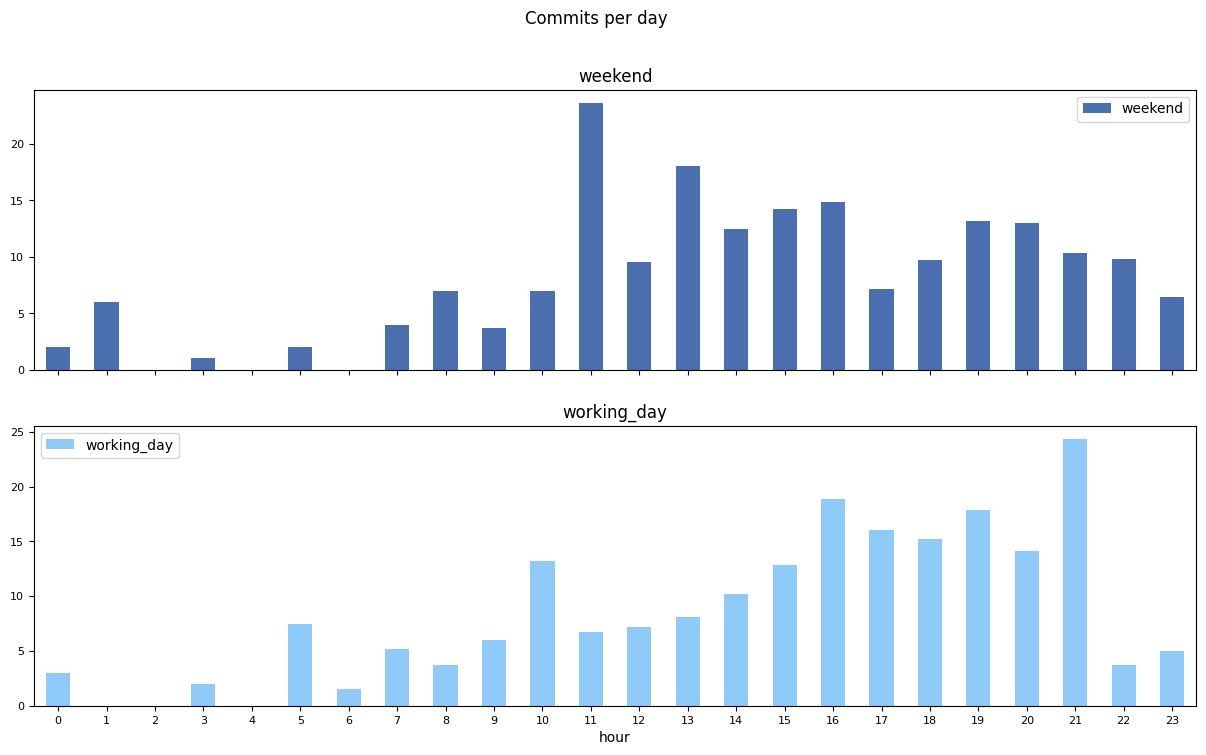

In [5]:
pivot_table = avg_per_hour.pivot(index='hour', columns='type', values='commit_count')
full_hours = pd.Index(range(24), name='hour')
pivot_table = pivot_table.reindex(full_hours, fill_value=0)
ax = pivot_table.plot(kind='bar', subplots=True, title='Commits per day', figsize=(15,8), rot=0, fontsize=8, color=['#4B6EAF', '#90CAF9'])

In [6]:
conn.close()

## Различается ли динамика коммитов в рабочие дни и выходные?
Да

Наибольшее число коммитов в будние дни в 21 час

В выходные - в 11 часов